In [1]:
import pandas as pd 
import re 
from geolib import geohash
from haversine import haversine, Unit
from math import radians, cos, sin, asin, sqrt
import numpy as np

In [2]:
def clean_long_lat(str_input):
    try :
        result = str_input.split('=')[-1] 
        result = result.replace(']','')
        result = result.replace('[','')   
        result = result.replace("'","")   
        return result 
    except : 
        return 'error'

def extract_lat(str_input):
    try : 
        return float(str_input.split(',')[0])
    except:
        return 0 


def extract_long(str_input):
    try : 
        return float(str_input.split(',')[1])
    except:
        return 0 

def geohash_neighbors(str_geohash):
    return 

def calculate_distance(lat1, lon1, lat2, lon2 ):
    # haversine formula 


    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c * 1000 # in meter 
    return km

def extract_price(price):

    if 'approx' in str(price) :
        price = price.split('approx')[0]
    else :
        pass 

    try : 
        return ''.join(re.findall(r'\d+',price))
    except : 
        return 'error'
    
def normalize_rating(rating):
    try:
        return float(rating)
    except :
        return 'error'

def normalize_review(rating):

    if isinstance(rating, str):
        rating = rating.replace(',','')

    try:
        return int(rating)
    except :
        return 'error'


In [3]:
df = pd.read_csv('data/2_jak_rest_detail.csv')
df = df.reset_index()

# df = pd.read_csv('data/2_jbdtk_rest_detail.csv')


df.shape

(7305, 9)

In [4]:
df[df['rating']=='-']['review'].value_counts()

0    448
1    398
2    284
3    255
Name: review, dtype: int64

# Extract Long and Lat 
extract lat and long from url 
adding geohash 

In [5]:
# separate lat long from url 
df['rest_longlat2'] = df['rest_longlat'].apply(clean_long_lat)

df['lat'] = df['rest_longlat2'].apply(extract_lat)
df['long'] = df['rest_longlat2'].apply(extract_long)

# remove non longlat 
df2 = df[df['rest_longlat']!='[]']

print(df2.shape)

(7290, 12)


In [6]:
# df[df['rest_longlat2']=='error']
df2.head(10)


,index,url,title,rest_type,rest_price,rest_facility,rest_longlat,rating,review,rest_longlat2,lat,long
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,Wakacao,Indonesian,Rp150.000 for two people (approx.),Takeaway Available|Indoor Seating|No Alcohol A...,['https://www.google.com/maps/dir/?api=1&desti...,3.8,56,"-6.1675310000,106.9017520000",-6.167531,106.901752
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,The Coffee Bean & Tea Leaf,Coffee|Tea|Desserts|American|Italian,Rp110.000 for two people (approx.),Takeaway Available|Indoor Seating|Brunch|Wifi|...,['https://www.google.com/maps/dir/?api=1&desti...,3,61,"-6.1573410000,106.9078880000",-6.157341,106.907888
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,Angke Kelapa Gading,Chinese,Rp450.000 for two people (approx.),Indoor Seating|Wifi|Valet Parking Available|Pr...,['https://www.google.com/maps/dir/?api=1&desti...,4.5,363,"-6.1526380000,106.8925760000",-6.152638,106.892576
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,Ikan Nila Pak Ugi,Seafood,Rp100.000 for two people (approx.),Home Delivery|Takeaway Available|Indoor Seatin...,['https://www.google.com/maps/dir/?api=1&desti...,3.9,113,"-6.1635880000,106.9036890000",-6.163588,106.903689
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,Hong Kong Sheng Kee Dessert,Chinese|Dimsum|Desserts,Rp220.000 for two people (approx.),Takeaway Available|Table booking recommended|I...,['https://www.google.com/maps/dir/?api=1&desti...,4.1,257,"-6.1572550000,106.9084300000",-6.157255,106.908430
5,5,https://www.zomato.com/jakarta/pappa-jack-kopi...,Pappa Jack Kopitiam,Peranakan|Coffee,Rp330.000 for two people (approx.),Breakfast|Takeaway Available|Table booking rec...,['https://www.google.com/maps/dir/?api=1&desti...,3.1,114,"-6.1713986588,106.8987610191",-6.171399,106.898761
6,6,https://www.zomato.com/jakarta/bakpao-lompobat...,Bakpao Lompobattang,Chinese,Rp36.000 for two people (approx.),Breakfast|Home Delivery|Takeaway Available|Ind...,['https://www.google.com/maps/dir/?api=1&desti...,3.6,35,"-6.1488131926,106.9105067477",-6.148813,106.910507
7,7,https://www.zomato.com/jakarta/soto-ayam-amben...,Soto Ayam Ambengan,Jawa|Soto|Indonesian,Rp100.000 for two people (approx.),Breakfast|Home Delivery|Takeaway Available|Wif...,['https://www.google.com/maps/dir/?api=1&desti...,3.1,28,"-6.1683799854,106.9004632160",-6.168380,106.900463
8,8,https://www.zomato.com/jakarta/negiya-express-...,Negiya Express,Japanese,Rp180.000 for two people (approx.),Home Delivery|Takeaway Available|Indoor Seatin...,['https://www.google.com/maps/dir/?api=1&desti...,4.3,"1,047","-6.1568761359,106.9100651890",-6.156876,106.910065
9,9,https://www.zomato.com/jakarta/sushi-go-kelapa...,Sushi Go!,Japanese|Sushi,Rp100.000 for two people (approx.),Takeaway Available|Indoor Seating|No Alcohol A...,['https://www.google.com/maps/dir/?api=1&desti...,4.5,"2,888","-6.1574894853,106.9079556316",-6.157489,106.907956


In [7]:
# df2['url'].value_counts()

In [8]:
# remove null values 
df2 = df2.dropna()

# Get Price 

In [9]:
df2['rest_price_idr'] =  df2['rest_price'].apply(extract_price)
print(df2.shape)

(7287, 13)


In [10]:
# df2[df2['rest_price_idr']=='error']
df2['rest_price_idr'].apply(float)

0       150000.0
1       110000.0
2       450000.0
3       100000.0
4       220000.0
          ...   
7300    120000.0
7301    120000.0
7302    150000.0
7303    150000.0
7304    500000.0
Name: rest_price_idr, Length: 7287, dtype: float64

In [11]:
df2.loc[2758]

index                                                          2758
url               https://www.zomato.com/jakarta/mad-milk-japane...
title                                      Mad Milk Japanese Bakery
rest_type                                           Japanese|Bakery
rest_price                       Rp155.000 for two people (approx.)
rest_facility     Home Delivery|Takeaway Available|Indoor Seatin...
rest_longlat      ['https://www.google.com/maps/dir/?api=1&desti...
rating                                                          New
review                                                 Newly Opened
rest_longlat2                          -6.0934915856,106.7494770533
lat                                                       -6.093492
long                                                     106.749477
rest_price_idr                                               155000
Name: 2758, dtype: object

# Get Rating and Review

In [12]:
df2['rating'] = df2['rating'].apply(normalize_rating)
print(df2.shape)

(7287, 13)


In [13]:
df2[df2['rating']=='error']

,index,url,title,rest_type,rest_price,rest_facility,rest_longlat,rating,review,rest_longlat2,lat,long,rest_price_idr
505,505,https://www.zomato.com/jakarta/cafe-tebet-27-t...,Cafe Tebet 27,Indonesian,Rp100.000 for two people (approx.),Home Delivery|Takeaway Available|Outdoor Seati...,['https://www.google.com/maps/dir/?api=1&desti...,error,0,"-6.2397820000,106.8459310000",-6.239782,106.845931,100000
511,511,https://www.zomato.com/jakarta/sate-perawan-te...,Sate Perawan,Satay|Indonesian,Rp130.000 for two people (approx.),Takeaway Available|Indoor Seating|No Alcohol A...,['https://www.google.com/maps/dir/?api=1&desti...,error,1,"-6.2381560000,106.8569220000",-6.238156,106.856922,130000
519,519,https://www.zomato.com/jakarta/bakmi-4g-bubur-...,Bakmi 4G & Bubur Ayam 3B,Bakmi,Rp50.000 for two people (approx.),Takeaway Available|Indoor Seating|No Alcohol A...,['https://www.google.com/maps/dir/?api=1&desti...,error,0,"-6.2327470000,106.8530870000",-6.232747,106.853087,50000
527,527,https://www.zomato.com/jakarta/nasi-timbel-aya...,Nasi Timbel & Ayam Bakar Bandung,Sunda,Rp80.000 for two people (approx.),Takeaway Available|Indoor Seating,['https://www.google.com/maps/dir/?api=1&desti...,error,2,"-6.2241220000,106.8432120000",-6.224122,106.843212,80000
528,528,https://www.zomato.com/jakarta/shantay-caf%C3%...,Shantay CafÃ©,Beverages,Rp35.000 for two people (approx.),Takeaway Available|Indoor Seating|Wifi,['https://www.google.com/maps/dir/?api=1&desti...,error,1,"-6.2352450000,106.8568700000",-6.235245,106.856870,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,7289,https://www.zomato.com/jakarta/thai-street-1-p...,Thai Street,Thai,Rp220.000 for two people (approx.),Takeaway Available|Indoor Seating,['https://www.google.com/maps/dir/?api=1&desti...,error,0,"-6.1277008894,106.7909855023",-6.127701,106.790986,220000
7290,7290,https://www.zomato.com/jakarta/delima-resturan...,Delima Resturant - Hariston Hotel,Indonesian|Chinese|Western,Rp200.000 for two people (approx.) Without alc...,Home Delivery|Takeaway Available|Full Bar Avai...,['https://www.google.com/maps/dir/?api=1&desti...,error,0,"-6.1375072654,106.7878027260",-6.137507,106.787803,200000
7291,7291,https://www.zomato.com/jakarta/kopi-daily-muar...,Kopi Daily,Beverages|Coffee,Rp80.000 for two people (approx.),Takeaway Available|Outdoor Seating|No Alcohol ...,['https://www.google.com/maps/dir/?api=1&desti...,error,2,"-6.1139509248,106.7781152576",-6.113951,106.778115,80000
7292,7292,https://www.zomato.com/jakarta/namba-kopi-muar...,Namba Kopi,Coffee,Rp80.000 for two people (approx.),Takeaway Available|Indoor Seating,['https://www.google.com/maps/dir/?api=1&desti...,error,2,"-6.1166170000,106.7805520000",-6.116617,106.780552,80000


In [14]:
df2['review'] = df2['review'].apply(normalize_review)
print(df2.shape)

(7287, 13)


In [15]:
df2[df2['review'] == 'error']

,index,url,title,rest_type,rest_price,rest_facility,rest_longlat,rating,review,rest_longlat2,lat,long,rest_price_idr
2758,2758,https://www.zomato.com/jakarta/mad-milk-japane...,Mad Milk Japanese Bakery,Japanese|Bakery,Rp155.000 for two people (approx.),Home Delivery|Takeaway Available|Indoor Seatin...,['https://www.google.com/maps/dir/?api=1&desti...,error,error,"-6.0934915856,106.7494770533",-6.093492,106.749477,155000
6517,6517,https://www.zomato.com/jakarta/taco-libre-jaka...,Taco Libre Jakarta,Mexican|Beverages,Rp300 for two people (approx.),Breakfast|Indoor Seating|Wifi,['https://www.google.com/maps/dir/?api=1&desti...,error,error,"-6.2655746394,106.8148588638",-6.265575,106.814859,300
7029,7029,https://www.zomato.com/jakarta/29-cosmo-classi...,29 Cosmo Classic Bar & Eatery,Indonesian,Rp200 for two people (approx.),Takeaway Available|Outdoor Seating|Wifi|Smokin...,['https://www.google.com/maps/dir/?api=1&desti...,error,error,"-6.2622130000,106.7888120000",-6.262213,106.788812,200


# Tag franchise restaurant 


In [16]:
df2_res_chain = df2['title'].value_counts().reset_index()
df2_res_chain.columns = ['title','count']

df2_res_chain = df2_res_chain[df2_res_chain['count'] >= 2]
df2_res_chain['is_chain'] = 1 

df2 = pd.merge(df2,df2_res_chain,left_on='title',right_on='title',how='left')
df2.drop('count', axis= 1 ,inplace = True)

df2['is_chain'] = df2['is_chain'].fillna(0)

df2['is_chain'] = df2['is_chain'].astype(int)

print(df2.shape)


(7287, 14)


In [17]:
df2.head()

,index,url,title,rest_type,rest_price,rest_facility,rest_longlat,rating,review,rest_longlat2,lat,long,rest_price_idr,is_chain
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,Wakacao,Indonesian,Rp150.000 for two people (approx.),Takeaway Available|Indoor Seating|No Alcohol A...,['https://www.google.com/maps/dir/?api=1&desti...,3.8,56,"-6.1675310000,106.9017520000",-6.167531,106.901752,150000,1
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,The Coffee Bean & Tea Leaf,Coffee|Tea|Desserts|American|Italian,Rp110.000 for two people (approx.),Takeaway Available|Indoor Seating|Brunch|Wifi|...,['https://www.google.com/maps/dir/?api=1&desti...,3.0,61,"-6.1573410000,106.9078880000",-6.157341,106.907888,110000,1
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,Angke Kelapa Gading,Chinese,Rp450.000 for two people (approx.),Indoor Seating|Wifi|Valet Parking Available|Pr...,['https://www.google.com/maps/dir/?api=1&desti...,4.5,363,"-6.1526380000,106.8925760000",-6.152638,106.892576,450000,0
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,Ikan Nila Pak Ugi,Seafood,Rp100.000 for two people (approx.),Home Delivery|Takeaway Available|Indoor Seatin...,['https://www.google.com/maps/dir/?api=1&desti...,3.9,113,"-6.1635880000,106.9036890000",-6.163588,106.903689,100000,0
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,Hong Kong Sheng Kee Dessert,Chinese|Dimsum|Desserts,Rp220.000 for two people (approx.),Takeaway Available|Table booking recommended|I...,['https://www.google.com/maps/dir/?api=1&desti...,4.1,257,"-6.1572550000,106.9084300000",-6.157255,106.908430,220000,1


<AxesSubplot:>

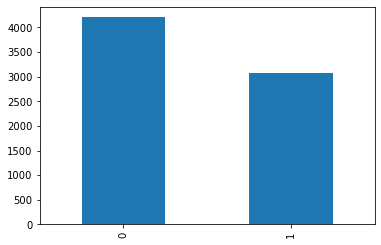

In [20]:
df2['is_chain'].value_counts().plot(kind='bar')

# Preprocessing restaurant features
facility and restaurant type

In [38]:
# df2['rest_facility'].apply(lambda x:x.split('|'))
tes_facility = df2['rest_facility'].apply(lambda x:x.split('|')).explode()
tes_rest_type = df2['rest_type'].apply(lambda x:x.split('|')).explode()

print('total unique facility {}'.format(tes_facility.value_counts().shape))
print('total unique restaurant type {}'.format(tes_rest_type.value_counts().shape))

total unique facility (54,)
total unique restaurant type (86,)


In [39]:
# tmp = df2[['index','rest_type']]
# tmp['check_rest_type'] = tmp.apply(lambda  x:1 if isinstance(x['rest_type'], float) else 0,axis=1)
# # tmp[tmp['rest_type']==3] 
# # tmp['rest_type'].sort_values()

# # isinstance(x, float)

# tmp[tmp['check_rest_type']==1]

In [40]:
def cat_encoding(df ,idx_col, cat_col):
    df_cat = df[[idx_col,cat_col]]
    df_cat[cat_col] = df_cat.apply(lambda x:x[cat_col].split('|'), axis =1)
    df_cat = df_cat.explode(cat_col)
    df_cat.columns = [idx_col,'category']
    df_cat['category'] = df_cat['category'].str.lower()
    df_cat['flag'] = 1
    df_cat = df_cat.pivot_table(index=idx_col, columns='category', values='flag').reset_index().fillna(0)
    cat_col = df_cat.columns[1:]
    df_cat[cat_col] = df_cat[cat_col].astype('int')
    df_cat[cat_col] = df_cat[cat_col].astype(str)
    df_cat['encode'] = df_cat[cat_col].apply(''.join, axis=1)

    return df_cat 

def cat_explode(df ,idx_col, cat_col):
    df_cat = df[[idx_col,cat_col]]
    df_cat[cat_col] = df_cat.apply(lambda x:x[cat_col].split('|'), axis =1)
    df_cat = df_cat.explode(cat_col)
    return df_cat 


def cat_manual_w_encode(df ,idx_col, cat_col, manual_df, cat_col_manual, new_cat):
    df_cat = cat_explode(df ,idx_col, cat_col)

    df_cat[cat_col] = df_cat[cat_col].str.lower()
    # df_cat_agg = df_cat[cat_col].value_counts().reset_index()
    # df_cat_agg.columns = [cat_col,'counts']

    df_merge = pd.merge(df_cat,manual_df,how='left', left_on=cat_col, right_on = cat_col_manual)
    # df_merge = df_merge.drop('count',axis=1)
    df_merge['values'] = 1

    df_merge['values'] = df_merge['values'].astype(int)
    # pivot 
    df_merge = df_merge.pivot_table(index=idx_col, columns=new_cat, values='values',).reset_index().fillna(0)
    
    return df_merge

## Retagging restaurant facility and type

In [41]:
df_res_fac_tag = pd.read_csv('data/2_rest_fact_count.csv')
df_res_fac_tag2 = cat_manual_w_encode(df2,'index','rest_facility',df_res_fac_tag.drop('counts',axis=1),'facility','new_facility')

df_res_type_tag = pd.read_csv('data/2_rest_type_count.csv')
df_res_type_tag2 = cat_manual_w_encode(df2,'index','rest_type',df_res_type_tag.drop('counts',axis=1),'rest_type','rest_type_new')

print('size facility : {}'.format(df_res_fac_tag2.shape))
print('restaurant type : {}'.format(df_res_type_tag2.shape))

size facility : (7287, 19)
restaurant type : (7287, 22)


<ipython-input-40-d973aa5ca8a8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[cat_col] = df_cat.apply(lambda x:x[cat_col].split('|'), axis =1)
<ipython-input-40-d973aa5ca8a8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[cat_col] = df_cat.apply(lambda x:x[cat_col].split('|'), axis =1)


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7287 entries, 0 to 7286
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7287 non-null   int64  
 1   url             7287 non-null   object 
 2   title           7287 non-null   object 
 3   rest_type       7287 non-null   object 
 4   rest_price      7287 non-null   object 
 5   rest_facility   7287 non-null   object 
 6   rest_longlat    7287 non-null   object 
 7   rating          7287 non-null   object 
 8   review          7287 non-null   object 
 9   rest_longlat2   7287 non-null   object 
 10  lat             7287 non-null   float64
 11  long            7287 non-null   float64
 12  rest_price_idr  7287 non-null   object 
 13  is_chain        7287 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(10)
memory usage: 825.5+ KB


<AxesSubplot:title={'center':'restaurant facility'}>

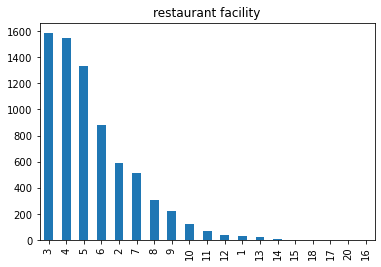

In [43]:
# statistic counts facility per restaurant 
rest_facility_count = df2['rest_facility'].apply(lambda x:len(x.split('|')))
rest_facility_count.value_counts().plot(kind='bar', title= 'restaurant facility')

In [44]:
# tmp = pd.merge(df2, df_res_type_tag2, left_on='index', right_on='index', how='left')

In [45]:
# idx_col = 'index'
# cat_col = 'rest_facility'
# df_cat =  df2[['index','rest_facility']]
# df_cat[cat_col] = df_cat.apply(lambda x:x[cat_col].split('|'), axis =1)
# df_cat = df_cat.explode(cat_col)
# # df_cat.columns = [idx_col,'category']
# # df_cat['category'] = df_cat['category'].str.lower()
# # df_cat['flag'] = 1
# # df_cat = df_cat.pivot_table(index=idx_col, columns='category', values='flag').reset_index().fillna(0)



In [46]:
# export manual tagging to csv 

# df_res_fac_exp = cat_explode(df2, 'index','rest_facility')
# df_res_fac_exp = df_res_fac_exp['rest_facility'].value_counts().reset_index()
# df_res_fac_exp.columns = ['facility','counts']
# df_res_fac_exp['facility'] = df_res_fac_exp['facility'].str.lower()

# df_res_fac_exp.to_csv('2_rest_fact_count.csv',index=False)

# df_res_type_exp = cat_explode(df2, 'index','rest_type')
# df_res_type_exp = df_res_type_exp['rest_type'].value_counts().reset_index()
# df_res_type_exp.columns = ['rest_type','counts']
# df_res_type_exp['rest_type'] = df_res_type_exp['rest_type'].str.lower()

# df_res_type_exp.to_csv('2_rest_type_count.csv',index=False)


In [47]:
# facility 
df_res_fac = cat_encoding(df2, 'index','rest_facility')
df_res_fac_code = df_res_fac['encode'].value_counts().reset_index()
df_res_fac_code.columns = ['encode','total']
df_res_fac_code['rank'] = np.arange(df_res_fac_code.shape[0])
df_res_fac_code['new_code'] = pd.cut(df_res_fac_code['total'], 5,labels=list(range(5)), ordered=True)
df_res_fac_encode = pd.merge(df_res_fac[['index','encode']],df_res_fac_code[['encode','new_code','rank']])

df_res_fac_encode.to_csv('data/2_res_fac.csv',index=False)

# type  
df_res_type = cat_encoding(df2, 'index','rest_type')
df_res_type_code = df_res_type['encode'].value_counts().reset_index()
df_res_type_code.columns = ['encode','total']
df_res_type_code['rank'] = np.arange(df_res_type_code.shape[0])
df_res_type_code['new_code'] = pd.cut(df_res_type_code['total'], 5,labels=list(range(5)), ordered=True)
df_res_type_encode = pd.merge(df_res_type[['index','encode']],df_res_type_code[['encode','new_code','rank']])

df_res_type_encode.to_csv('data/2_res_type.csv',index=False)

<ipython-input-40-d973aa5ca8a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[cat_col] = df_cat.apply(lambda x:x[cat_col].split('|'), axis =1)
<ipython-input-40-d973aa5ca8a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[cat_col] = df_cat.apply(lambda x:x[cat_col].split('|'), axis =1)


In [48]:
df2.head().iloc[0]['rest_facility']

'Takeaway Available|Indoor Seating|No Alcohol Available'

# Finishing

In [49]:
df2.head()

,index,url,title,rest_type,rest_price,rest_facility,rest_longlat,rating,review,rest_longlat2,lat,long,rest_price_idr,is_chain
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,Wakacao,Indonesian,Rp150.000 for two people (approx.),Takeaway Available|Indoor Seating|No Alcohol A...,['https://www.google.com/maps/dir/?api=1&desti...,3.8,56,"-6.1675310000,106.9017520000",-6.167531,106.901752,150000,1
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,The Coffee Bean & Tea Leaf,Coffee|Tea|Desserts|American|Italian,Rp110.000 for two people (approx.),Takeaway Available|Indoor Seating|Brunch|Wifi|...,['https://www.google.com/maps/dir/?api=1&desti...,3.0,61,"-6.1573410000,106.9078880000",-6.157341,106.907888,110000,1
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,Angke Kelapa Gading,Chinese,Rp450.000 for two people (approx.),Indoor Seating|Wifi|Valet Parking Available|Pr...,['https://www.google.com/maps/dir/?api=1&desti...,4.5,363,"-6.1526380000,106.8925760000",-6.152638,106.892576,450000,0
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,Ikan Nila Pak Ugi,Seafood,Rp100.000 for two people (approx.),Home Delivery|Takeaway Available|Indoor Seatin...,['https://www.google.com/maps/dir/?api=1&desti...,3.9,113,"-6.1635880000,106.9036890000",-6.163588,106.903689,100000,0
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,Hong Kong Sheng Kee Dessert,Chinese|Dimsum|Desserts,Rp220.000 for two people (approx.),Takeaway Available|Table booking recommended|I...,['https://www.google.com/maps/dir/?api=1&desti...,4.1,257,"-6.1572550000,106.9084300000",-6.157255,106.908430,220000,1


In [50]:
df_res_fac_tag2.head()

new_facility,index,alcohol,delivery,entertainment,indoor seating,kid friendly,no alcohol available,others,outdoor seating,parking service,praying room,private dining area available,self service,smoking area,special_meal,table booking,table booking not available,table reservation required,takeaway available
0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [57]:
df2_final = pd.DataFrame()
df2_final['index'] = df2['index']
df2_final['url'] = df2['url']
df2_final['rest_price_idr'] = df2['rest_price_idr']
df2_final['review'] = df2['review']
df2_final['lat'] = df2['lat']
df2_final['long'] = df2['long']
df2_final['is_chain'] = df2['is_chain']
df2_final['rating'] = df2['rating']

# join with restaurant types and facilities 
# encode version 
# df2_final = pd.merge(df2_final,df_res_type_encode[['index','new_code','rank']], left_on='index', right_on='index', how='left')
# df2_final = df2_final.rename(columns = {'new_code':'new_code_res_type','rank':'rank_res_type'})

# df2_final = pd.merge(df2_final,df_res_fac_encode[['index','new_code','rank']],left_on='index', right_on='index',how='left')
# df2_final = df2_final.rename(columns = {'new_code':'new_code_fac','rank':'rank_fac'})


# join with restaurant types and facilities
# original version  
df2_final = pd.merge(df2_final,df_res_fac_tag2, left_on='index', right_on='index', how='left')
df2_final = df2_final.rename(columns = {'new_code':'new_code_res_type','rank':'rank_res_type'})

df2_final = pd.merge(df2_final,df_res_type_tag2,left_on='index', right_on='index',how='left')
df2_final = df2_final.rename(columns = {'new_code':'new_code_fac','rank':'rank_fac'})
df2_final = df2_final.rename(columns={'others_x':'others_facility','others_y':'others_type'})


# # remove error values 

df2_final = df2_final[(df2_final['rest_price_idr'] != 'error') ] 
print('afte remove price :',df2_final.shape[0])

df2_final = df2_final[(df2_final['rating']!= 'error') ] 
print('afte remove rating :',df2_final.shape[0])
df2_final = df2_final[(df2_final['review']!= 'error') ]
print('afte remove review :',df2_final.shape[0])

# # casting to correct values 
df2_final['rest_price_idr'] = df2_final['rest_price_idr'].astype(float)
# # df2_final['review'] = df2_final['review'].str.replace(',','')
df2_final['review'] = df2_final['review'].astype(float)
df2_final['rating'] = df2_final['rating'].astype(float)
df2_final['rest_price_idr'] = df2_final['rest_price_idr'].astype(int)


afte remove price : 7287
afte remove rating : 5914
afte remove review : 5914


In [58]:
df2.shape, df2_final.shape

((7287, 14), (5914, 47))

In [59]:
df2_final['is_chain'].value_counts()

0    3169
1    2745
Name: is_chain, dtype: int64

In [60]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5914 entries, 0 to 7286
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          5914 non-null   int64  
 1   url                            5914 non-null   object 
 2   rest_price_idr                 5914 non-null   int32  
 3   review                         5914 non-null   float64
 4   lat                            5914 non-null   float64
 5   long                           5914 non-null   float64
 6   is_chain                       5914 non-null   int32  
 7   rating                         5914 non-null   float64
 8   alcohol                        5914 non-null   float64
 9   delivery                       5914 non-null   float64
 10  entertainment                  5914 non-null   float64
 11  indoor seating                 5914 non-null   float64
 12  kid friendly                   5914 non-null   f

In [56]:
df2_final.isnull().sum()
# df2.isnull().sum()

index                            0
url                              0
rest_price_idr                   0
review                           0
lat                              0
long                             0
is_chain                         0
rating                           0
alcohol                          0
delivery                         0
entertainment                    0
indoor seating                   0
kid friendly                     0
no alcohol available             0
others_x                         0
outdoor seating                  0
parking service                  0
praying room                     0
private dining area available    0
self service                     0
smoking area                     0
special_meal                     0
table booking                    0
table booking not available      0
table reservation required       0
takeaway available               0
asian                            0
bakery                           0
beverages           

In [62]:
# df2_final[df2_final['rank_fac'].isnull()]

In [63]:
# encode 
# df2_final.to_csv('data/3_jbdk_clean_zomato_feat.csv',index=False)

# original 
df2_final.to_csv('data/3_clean_zomato_feat_ori.csv',index=False)

# Explore geohash neighbors 

In [39]:
df2_geo = df2[['index','lat','long']]
df2_geo['geohash'] = df2_geo.apply(lambda x:geohash.encode(x['lat'],x['long'],6),axis=1)

df2_geo_uniq = df2_geo[['index','lat','long','geohash']].drop_duplicates()

df2_geo['neighbors'] = df2_geo['geohash'].apply(lambda x:list(geohash.neighbours(x)))
df2_geo = df2_geo.explode('neighbors')

df2_geo.columns = [col+'2' for col in df2_geo.columns]

<ipython-input-39-3ac793a2ed75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_geo['geohash'] = df2_geo.apply(lambda x:geohash.encode(x['lat'],x['long'],6),axis=1)
<ipython-input-39-3ac793a2ed75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_geo['neighbors'] = df2_geo['geohash'].apply(lambda x:list(geohash.neighbours(x)))


In [129]:
df_geo_merge = pd.merge(df2_geo_uniq, df2_geo, left_on = 'geohash', right_on = 'neighbors2')
df_geo_merge['distance'] = df_geo_merge.apply(lambda x:calculate_distance(x['lat'],x['long'],x['lat2'],x['long2']), axis= 1)

df_geo_merge = df_geo_merge[df_geo_merge['distance'] < 1000]

In [130]:
df_geo_merge.head()

,index,lat,long,geohash,index2,lat2,long2,geohash2,neighbors2,distance
0,0,-6.167531,106.901752,qquhbt,5,-6.171399,106.898761,qquhbs,qquhbt,542.142839
3,0,-6.167531,106.901752,qquhbt,28,-6.171066,106.898276,qquhbs,qquhbt,549.367462
4,0,-6.167531,106.901752,qquhbt,30,-6.170421,106.899426,qquhbs,qquhbt,411.313918
5,0,-6.167531,106.901752,qquhbt,33,-6.161882,106.904170,qquhbw,qquhbt,682.225851
7,0,-6.167531,106.901752,qquhbt,44,-6.170592,106.909284,qquhbu,qquhbt,898.963975


In [131]:
df2_geo_uniq

,index,lat,long,geohash
0,0,-6.167531,106.901752,qquhbt
1,1,-6.157341,106.907888,qquhbx
2,2,-6.152638,106.892576,qquhbr
3,3,-6.163588,106.903689,qquhbt
4,4,-6.157255,106.908430,qquhbz
...,...,...,...,...
7285,7300,-6.182180,106.842239,qqguz6
7286,7301,-6.188693,106.846740,qqguz3
7287,7302,-6.177425,106.841511,qqguz5
7288,7303,-6.189673,106.845534,qqguz3


In [133]:
calculate_distance(-6.167531, 106.901752,-6.171399,106.898761)

542.1741839700793